# 1. 데이터 불러오기와 데이터셋 나누기

In [ ]:
#일반적인 경고 메세지는 무시함
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Pandas 라이브러리를 선언함
import pandas as pd

In [ ]:
#One-hot Coding과 연속데이터 스케일링을 수행한 Fvote.cav 파일을 불러옴
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/Fvote.csv', encoding='utf-8')

In [ ]:
#입력에 해당하는 feature들을 X로 저장함
X=data[['gender_female', 'gender_male', 'region_Chungcheung', 'region_Honam', 
        'region_Others', 'region_Sudo', 'region_Youngnam', 'edu', 'income', 
        'age', 'score_gov', 'score_progress', 'score_intention']]

In [ ]:
#출력에 해당하는 레이블 중에서 vote만 y로 저장함
y=data[['vote']]

In [ ]:
#데이터를 Train와 Test 셋으로 분리하기 위한 라이브러리를 선언함
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42 )

# 2. Grid Search 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10]}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True)

In [ ]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'n_neighbors': 9}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.646


In [ ]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.830


In [ ]:
result_grid= pd.DataFrame(grid_search.cv_results_)

In [ ]:
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003916,0.001489,0.003771,0.001604,1,{'n_neighbors': 1},0.59375,0.53125,0.50000,0.451613,...,0.512097,0.048240,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.002953,0.000027,0.003035,0.000132,2,{'n_neighbors': 2},0.50000,0.46875,0.37500,0.354839,...,0.417137,0.056726,10,0.722222,0.730159,0.682540,0.771654,0.716535,0.724622,0.028582
2,0.003419,0.000784,0.003403,0.000744,3,{'n_neighbors': 3},0.65625,0.59375,0.53125,0.419355,...,0.536895,0.082628,6,0.746032,0.769841,0.793651,0.795276,0.740157,0.768991,0.023057
3,0.003140,0.000354,0.003462,0.000949,4,{'n_neighbors': 4},0.59375,0.43750,0.37500,0.419355,...,0.461895,0.074598,9,0.650794,0.730159,0.738095,0.740157,0.692913,0.710424,0.034356
4,0.003701,0.000865,0.003927,0.001205,5,{'n_neighbors': 5},0.65625,0.50000,0.62500,0.516129,...,0.569153,0.061204,4,0.690476,0.714286,0.738095,0.724409,0.692913,0.712036,0.018263
5,0.003244,0.000582,0.003353,0.000805,6,{'n_neighbors': 6},0.56250,0.40625,0.53125,0.548387,...,0.506452,0.056684,8,0.666667,0.706349,0.730159,0.653543,0.685039,0.688351,0.027439
6,0.002956,0.000065,0.002941,0.000094,7,{'n_neighbors': 7},0.59375,0.56250,0.65625,0.548387,...,0.588306,0.037321,3,0.706349,0.682540,0.714286,0.685039,0.700787,0.697800,0.012243
7,0.002966,0.000090,0.002999,0.000070,8,{'n_neighbors': 8},0.56250,0.50000,0.62500,0.516129,...,0.543952,0.045591,5,0.658730,0.674603,0.690476,0.669291,0.685039,0.675628,0.011276
8,0.003173,0.000513,0.003097,0.000384,9,{'n_neighbors': 9},0.68750,0.56250,0.65625,0.645161,...,0.645766,0.044243,1,0.714286,0.714286,0.706349,0.692913,0.685039,0.702575,0.011742
9,0.002911,0.000033,0.002928,0.000049,10,{'n_neighbors': 10},0.65625,0.59375,0.65625,0.645161,...,0.645766,0.028028,1,0.682540,0.690476,0.730159,0.629921,0.700787,0.686777,0.032688


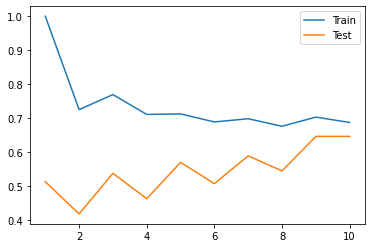

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_test_score'], label="Test")
plt.legend()

# 3. Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import randint

In [ ]:
param_distribs = {'n_neighbors': randint(low=1, high=20)}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
random_search=RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distribs, cv=5, return_train_score=True)

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6f9f4a9b90>},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'n_neighbors': 16}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.684


In [ ]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.755


In [ ]:
result_random = random_search.cv_results_

In [ ]:
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003711,0.000981,0.003425,0.000510,6,{'n_neighbors': 6},0.56250,0.40625,0.53125,0.548387,...,0.506452,0.056684,9,0.666667,0.706349,0.730159,0.653543,0.685039,0.688351,0.027439
1,0.004246,0.002102,0.003811,0.001174,4,{'n_neighbors': 4},0.59375,0.43750,0.37500,0.419355,...,0.461895,0.074598,10,0.650794,0.730159,0.738095,0.740157,0.692913,0.710424,0.034356
2,0.002996,0.000062,0.002947,0.000059,7,{'n_neighbors': 7},0.59375,0.56250,0.65625,0.548387,...,0.588306,0.037321,6,0.706349,0.682540,0.714286,0.685039,0.700787,0.697800,0.012243
3,0.003006,0.000186,0.002880,0.000026,3,{'n_neighbors': 3},0.65625,0.59375,0.53125,0.419355,...,0.536895,0.082628,7,0.746032,0.769841,0.793651,0.795276,0.740157,0.768991,0.023057
4,0.002904,0.000023,0.003025,0.000087,16,{'n_neighbors': 16},0.68750,0.65625,0.62500,0.741935,...,0.684073,0.040692,1,0.706349,0.706349,0.706349,0.661417,0.685039,0.693101,0.017863
5,0.002983,0.000143,0.002954,0.000025,16,{'n_neighbors': 16},0.68750,0.65625,0.62500,0.741935,...,0.684073,0.040692,1,0.706349,0.706349,0.706349,0.661417,0.685039,0.693101,0.017863
6,0.002918,0.000047,0.002981,0.000046,16,{'n_neighbors': 16},0.68750,0.65625,0.62500,0.741935,...,0.684073,0.040692,1,0.706349,0.706349,0.706349,0.661417,0.685039,0.693101,0.017863
7,0.003068,0.000266,0.003126,0.000311,9,{'n_neighbors': 9},0.68750,0.56250,0.65625,0.645161,...,0.645766,0.044243,5,0.714286,0.714286,0.706349,0.692913,0.685039,0.702575,0.011742
8,0.003009,0.000139,0.003076,0.000137,19,{'n_neighbors': 19},0.68750,0.65625,0.65625,0.709677,...,0.677419,0.020192,4,0.698413,0.706349,0.722222,0.685039,0.716535,0.705712,0.013197
9,0.002875,0.000005,0.002914,0.000082,3,{'n_neighbors': 3},0.65625,0.59375,0.53125,0.419355,...,0.536895,0.082628,7,0.746032,0.769841,0.793651,0.795276,0.740157,0.768991,0.023057


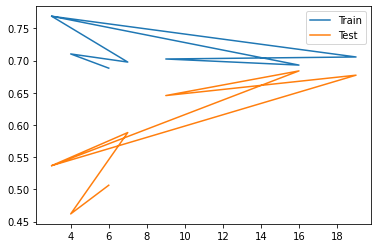

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_n_neighbors'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_n_neighbors'], result_random['mean_test_score'], label="Test")
plt.legend()

# 4. 모델평가

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn9=KNeighborsClassifier(n_neighbors=9)

In [ ]:
knn9.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
from sklearn.metrics import confusion_matrix
# Confusion matrix에서
# [정확도]Accuracy =(TN + TP) / Total
# [정밀도]Precision = TP / (TP + FP)
# [재현율]Recall = TP / (TP + FN)
# f-score = 2 / ((1 / precision) + (1 / recall))

In [ ]:
pred_train=knn9.predict(X_train)

In [ ]:
confusion_train=confusion_matrix(y_train, pred_train)

In [ ]:
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[  6  42]
 [  2 108]]


In [ ]:
pred_test=knn9.predict(X_test)

In [ ]:
confusion_test=confusion_matrix(y_test, pred_test)

In [ ]:
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[ 5  8]
 [ 1 39]]


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
TP=39
FP=8
FN=1
TN=5

In [ ]:
#precision
precision=TP/(TP+FP)
precision

0.8297872340425532

In [ ]:
#recall
recall=TP/(TP+FN)
recall

0.975

In [ ]:
f_score=2/((1/precision)+(1/recall))
f_score

0.896551724137931

In [ ]:
f1=f1_score(y_test, pred_test)

In [ ]:
print("f1 score:\n", f1)

f1 score:
 0.896551724137931


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cfreport=classification_report(y_test, pred_test)
#classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False)[source]

In [ ]:
cfreport

'              precision    recall  f1-score   support\n\n           0       0.83      0.38      0.53        13\n           1       0.83      0.97      0.90        40\n\n    accuracy                           0.83        53\n   macro avg       0.83      0.68      0.71        53\nweighted avg       0.83      0.83      0.81        53\n'

In [ ]:
print("분류예측 레포트:\n", cfreport)
# support : the number of occurrences of each class in y_true
# micro average (averaging the total TP, FN and FP)
# macro average (averaging the unweighted mean per label)
# weighted average (averaging the support-weighted mean per label)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.83      0.38      0.53        13
           1       0.83      0.97      0.90        40

    accuracy                           0.83        53
   macro avg       0.83      0.68      0.71        53
weighted avg       0.83      0.83      0.81        53

